<a href="https://colab.research.google.com/github/kuanysh-zhaksylyk/ml_training/blob/main/ML_SELFEDU_TRAINING_3_BINARY_CLASSIFICATION_WITH_SGD_AND_SAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 0.32578081 -0.16067955  0.00519746]
[1.0, 1.0, 0.9968586640521885, 0.9916451535359322, 0.984869232904286, 0.9926908342046391, 0.9997393839631784, 0.9921024083033477, 0.9849823887531713, 0.9910301649597765, 0.9964469402945089, 0.9893852649291985, 0.9807892372227196, 0.9865504282753547, 0.9910396993009032, 0.9834764050515766, 0.9772325113908172, 0.9828105096996299, 0.9764428091428058, 0.968048010516876, 0.9741285207663732, 0.966476160384658, 0.9584870020437188, 0.9649737045981155, 0.9724991148379144, 0.9789744106866892, 0.9823993986308831, 0.9756397166399378, 0.9768714532868955, 0.97906758847523, 0.9753055073754903, 0.9761028664519619, 0.9719636386014975, 0.9694314362629998, 0.9684877862434859, 0.9666229001650298, 0.9682998484609384, 0.9632937285758516, 0.9636009392654771, 0.9619254786600103, 0.9559925661518386, 0.9565345905172737, 0.9555298227302008, 0.9572170142245946, 0.9559253560854073, 0.9577433600731942, 0.9511056406789082, 0.9473822982840711, 0.9399547978621907, 0.93179107772490

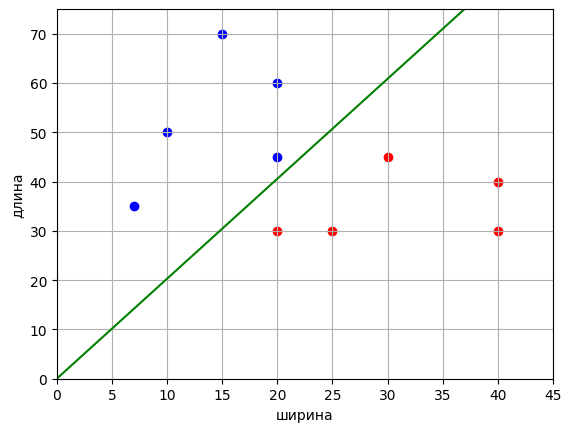

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))


# производная сигмоидной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y


# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = 0.0005  # шаг сходимости SGD
lm = 0.01  # скорость "забывания" для Q
N = 500  # число итераций SGD

Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

for i in range(N):
    k = np.random.randint(0, n_train - 1)  # случайный индекс
    ek = loss(w, x_train[k], y_train[k])  # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q  # пересчет показателя качества
    Q_plot.append(Q)

print(w)
print(Q_plot)

line_x = list(range(max(x_train[:, 0])))  # формирование графика разделяющей линии
line_y = [-x * w[0] / w[1] - w[2] / w[1] for x in line_x]

x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()